# DATA SCIENCE FROM SCRATCH

By: Yaneth Ccahuantico Mendoza

## CAPÍTULO N° 1. Introducción

In [1]:
# Finding Key Connectors

users = [
 { "id": 0, "name": "Hero" },
 { "id": 1, "name": "Dunn" },
 { "id": 2, "name": "Sue" },
 { "id": 3, "name": "Chi" },
 { "id": 4, "name": "Thor" },
 { "id": 5, "name": "Clive" },
 { "id": 6, "name": "Hicks" },
 { "id": 7, "name": "Devin" },
 { "id": 8, "name": "Kate" },
 { "id": 9, "name": "Klein" }
]

In [2]:
users

[{'id': 0, 'name': 'Hero'},
 {'id': 1, 'name': 'Dunn'},
 {'id': 2, 'name': 'Sue'},
 {'id': 3, 'name': 'Chi'},
 {'id': 4, 'name': 'Thor'},
 {'id': 5, 'name': 'Clive'},
 {'id': 6, 'name': 'Hicks'},
 {'id': 7, 'name': 'Devin'},
 {'id': 8, 'name': 'Kate'},
 {'id': 9, 'name': 'Klein'}]

In [3]:
# “friendship” data

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), 
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [4]:
friendships

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8),
 (7, 8),
 (8, 9)]

In [5]:
from IPython.display import Image

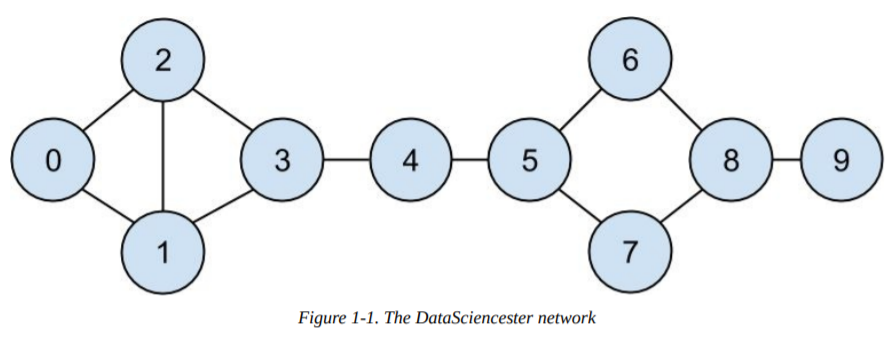

In [7]:
Image(filename="C:/Users/Yaneth/Desktop/Data/Big Data - Analytics/Python Data Science from Scratch/Imagenes/network.png")

In [24]:
# we might want to add a list of friends to each user. First we set each user’s
#friends property to an empty list

for user in users:
    user["friends"] = []

In [25]:
user

{'friends': [], 'id': 9, 'name': 'Klein'}

In [26]:
# And then we populate the lists using the friendships data:

for i, j in friendships:
    # this works because users[i] is the user whose id is i
    users[i]["friends"].append(users[j]) # add i as a friend of j
    users[j]["friends"].append(users[i]) # add j as a friend of i
 

In [28]:
users

[{'friends': [{'friends': [{...},
     {'friends': [{...},
       {...},
       {'friends': [{...},
         {...},
         {'friends': [{...},
           {'friends': [{...},
             {'friends': [{...},
               {'friends': [{...},
                 {'friends': [{...}, {...}], 'id': 7, 'name': 'Devin'},
                 {'friends': [{...}], 'id': 9, 'name': 'Klein'}],
                'id': 8,
                'name': 'Kate'}],
              'id': 6,
              'name': 'Hicks'},
             {'friends': [{...},
               {'friends': [{'friends': [{...}, {...}],
                  'id': 6,
                  'name': 'Hicks'},
                 {...},
                 {'friends': [{...}], 'id': 9, 'name': 'Klein'}],
                'id': 8,
                'name': 'Kate'}],
              'id': 7,
              'name': 'Devin'}],
            'id': 5,
            'name': 'Clive'}],
          'id': 4,
          'name': 'Thor'}],
        'id': 3,
        'name': 'Chi'}],
      

In [27]:
# First we find the total number of connections, by summing up the lengths of all the
# friends lists:

def number_of_friends(user):
 #"""how many friends does _user_ have?"""
 return len(user["friends"])                      # length of friend_ids list

total_connections = sum(number_of_friends(user)
                    for user in users)            # 24

print (total_connections)

# And then we just divide by the number of users:

from __future__ import division                   # integer division is lame
num_users = len(users)                            # length of the users list
avg_connections = total_connections / num_users   # 2.4

print (avg_connections)

24
2.4


In [30]:
# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
                     for user in users]



In [33]:
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [36]:
sorted(num_friends_by_id, # get it sorted
       key=lambda(user_id, num_friends): num_friends, # by num_friends
       reverse=True) # largest to smalles


SyntaxError: invalid syntax (<ipython-input-36-704c36a54e1d>, line 2)

In [37]:
# for each of a user’s friends, iterate over that person’s friends, and collect
# all the results:

def friends_of_friend_ids_bad(user):
    # "foaf" is short for "friend of a friend"
    return [foaf["id"] 
            for friend in user["friends"]        # for each of user's friends
            for foaf in friend["friends"]]       # get each of _their_ friends

In [38]:
friends_of_friend_ids_bad (user)

[6, 7, 9]

In [40]:
print ([friend["id"] for friend in users[0]["friends"]]) # [1, 2]
print ([friend["id"] for friend in users[1]["friends"]]) # [0, 2, 3]
print ([friend["id"] for friend in users[2]["friends"]]) # [0, 1, 3]

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [42]:
# Knowing that people are friends-of-friends in multiple ways seems like interesting
# information, so maybe instead we should produce a count of mutual friends. And we
# definitely should use a helper function to exclude people already known to the user:
    

from collections import Counter                        # not loaded by default

def not_the_same(user, other_user):
 """two users are not the same if they have different ids"""
 return user["id"] != other_user["id"]

def not_friends(user, other_user):
 """other_user is not a friend if he's not in user["friends"];
 that is, if he's not_the_same as all the people in user["friends"]"""
 return all(not_the_same(friend, other_user)
 for friend in user["friends"])

def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                   for friend in user["friends"]       # for each of my friends
                   for foaf in friend["friends"]       # count *their* friends
                   if not_the_same(user, foaf)         # who aren't me
                   and not_friends(user, foaf))        # and aren't my friends

print (friends_of_friend_ids(users[3]))                  # Counter({0: 2, 5: 1})

Counter({0: 2, 5: 1})


In [25]:
# list of pairs (user_id, interest):

interests = [
 (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
 (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
 (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
 (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
 (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
 (3, "statistics"), (3, "regression"), (3, "probability"),
 (4, "machine learning"), (4, "regression"), (4, "decision trees"),
 (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
 (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
 (6, "probability"), (6, "mathematics"), (6, "theory"),
 (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
 (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
 (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
 (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [44]:
interests

[(0, 'Hadoop'),
 (0, 'Big Data'),
 (0, 'HBase'),
 (0, 'Java'),
 (0, 'Spark'),
 (0, 'Storm'),
 (0, 'Cassandra'),
 (1, 'NoSQL'),
 (1, 'MongoDB'),
 (1, 'Cassandra'),
 (1, 'HBase'),
 (1, 'Postgres'),
 (2, 'Python'),
 (2, 'scikit-learn'),
 (2, 'scipy'),
 (2, 'numpy'),
 (2, 'statsmodels'),
 (2, 'pandas'),
 (3, 'R'),
 (3, 'Python'),
 (3, 'statistics'),
 (3, 'regression'),
 (3, 'probability'),
 (4, 'machine learning'),
 (4, 'regression'),
 (4, 'decision trees'),
 (4, 'libsvm'),
 (5, 'Python'),
 (5, 'R'),
 (5, 'Java'),
 (5, 'C++'),
 (5, 'Haskell'),
 (5, 'programming languages'),
 (6, 'statistics'),
 (6, 'probability'),
 (6, 'mathematics'),
 (6, 'theory'),
 (7, 'machine learning'),
 (7, 'scikit-learn'),
 (7, 'Mahout'),
 (7, 'neural networks'),
 (8, 'neural networks'),
 (8, 'deep learning'),
 (8, 'Big Data'),
 (8, 'artificial intelligence'),
 (9, 'Hadoop'),
 (9, 'Java'),
 (9, 'MapReduce'),
 (9, 'Big Data')]

In [57]:
# build a function that finds users with a certain interest:

def data_scientists_who_like(target_interest):
    return [user_id
            for user_id, user_interest in interests # tenemos la lista arriba
            if user_interest == target_interest]

In [58]:
data_scientists_who_like("Java")

[0, 5, 9]

In [63]:
# we’re probably better off building an index from interests to users:

from collections import defaultdict

# keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

print(user_ids_by_interest)


defaultdict(<class 'list'>, {})


In [66]:
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

print(user_ids_by_interest)

defaultdict(<class 'list'>, {'Storm': [0, 0], 'mathematics': [6, 6], 'pandas': [2, 2], 'C++': [5, 5], 'deep learning': [8, 8], 'Haskell': [5, 5], 'HBase': [0, 1, 0, 1], 'Spark': [0, 0], 'Postgres': [1, 1], 'programming languages': [5, 5], 'neural networks': [7, 8, 7, 8], 'regression': [3, 4, 3, 4], 'Big Data': [0, 8, 9, 0, 8, 9], 'numpy': [2, 2], 'statsmodels': [2, 2], 'scikit-learn': [2, 7, 2, 7], 'decision trees': [4, 4], 'MapReduce': [9, 9], 'MongoDB': [1, 1], 'Cassandra': [0, 1, 0, 1], 'R': [3, 5, 3, 5], 'Java': [0, 5, 9, 0, 5, 9], 'theory': [6, 6], 'artificial intelligence': [8, 8], 'Hadoop': [0, 9, 0, 9], 'NoSQL': [1, 1], 'machine learning': [4, 7, 4, 7], 'scipy': [2, 2], 'statistics': [3, 6, 3, 6], 'Mahout': [7, 7], 'Python': [2, 3, 5, 2, 3, 5], 'probability': [3, 6, 3, 6], 'libsvm': [4, 4]})


In [67]:
# And another from users to interests:

# keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
print(interests_by_user_id)

defaultdict(<class 'list'>, {0: ['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra'], 1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'], 2: ['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas'], 3: ['R', 'Python', 'statistics', 'regression', 'probability'], 4: ['machine learning', 'regression', 'decision trees', 'libsvm'], 5: ['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages'], 6: ['statistics', 'probability', 'mathematics', 'theory'], 7: ['machine learning', 'scikit-learn', 'Mahout', 'neural networks'], 8: ['neural networks', 'deep learning', 'Big Data', 'artificial intelligence'], 9: ['Hadoop', 'Java', 'MapReduce', 'Big Data']})


In [70]:
# common interests
def most_common_interests_with(user):
    return Counter(interested_user_id
                for interest in interests_by_user_id[user["id"]]
                for interested_user_id in user_ids_by_interest[interest]
                if interested_user_id != user["id"])


In [1]:
from matplotlib import pyplot as plt

In [2]:
# Salaries and Experience

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]



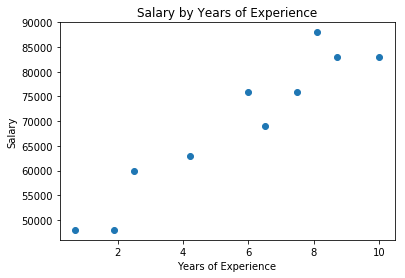

In [7]:
salaries = [83000,88000,48000,76000,69000,76000,60000,83000,48000,63000]
years_experience = [8.7,8.1,0.7,6,6.5,7.5,2.5,10,1.9,4.2]

plt.scatter(years_experience,salaries)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary by Years of Experience")
plt.show()

In [12]:
#  average salary for each tenure:

# keys are years, values are lists of the salaries for each tenure

from collections import defaultdict

salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

print(salary_by_tenure)
    
# keys are years, each value is average salary for that tenure
average_salary_by_tenure = {
 tenure : sum(salaries) / len(salaries)
 for tenure, salaries in salary_by_tenure.items()
}

print(average_salary_by_tenure)

defaultdict(<class 'list'>, {8.7: [83000], 8.1: [88000], 0.7: [48000], 6: [76000], 6.5: [69000], 7.5: [76000], 2.5: [60000], 10: [83000], 1.9: [48000], 4.2: [63000]})
{8.7: 83000.0, 8.1: 88000.0, 0.7: 48000.0, 6: 76000.0, 6.5: 69000.0, 7.5: 76000.0, 2.5: 60000.0, 10: 83000.0, 1.9: 48000.0, 4.2: 63000.0}


In [13]:
# It might be more helpful to bucket the tenures:

def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [16]:
tenure_bucket(6) # 6 years of experience

'more than five'

In [17]:
# Then group together the salaries corresponding to each bucket:

# keys are tenure buckets, values are lists of salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)
    
print (salary_by_tenure_bucket)

defaultdict(<class 'list'>, {'more than five': [83000, 88000, 76000, 69000, 76000, 83000], 'less than two': [48000, 48000], 'between two and five': [60000, 63000]})


In [29]:
# And finally compute the average salary for each group:

# keys are tenure buckets, values are average salary for that bucket
average_salary_by_bucket = {
 tenure_bucket : sum(salaries) / len(salaries)
 for tenure_bucket, salaries in salary_by_tenure_bucket.iteritems()
}



AttributeError: 'collections.defaultdict' object has no attribute 'iteritems'

In [21]:
# Users with very few and very many years of experience tend to pay

def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"

In [22]:
predict_paid_or_unpaid(10)

'paid'

In [26]:
# One simple (if not particularly exciting) way to find the most popular interests is simply to count the words:
# 1. Lowercase each interest (since different users may or may not capitalize their interests).
# 2. Split it into words.
# 3. Count the results.

from collections import Counter

words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())


In [28]:
# This makes it easy to list out the words that occur more than once:

for word, count in words_and_counts.most_common():
    if count > 1:
        print (word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
